In [99]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy.io


In [100]:
# Question 2 Part A

matrix = np.array([[1, 0],
                   [1, 1],
                   [1, 3]])


inverse = np.linalg.inv(matrix.T@matrix)
proj_a = matrix @  inverse @ matrix.T
proj_a

array([[ 0.71428571,  0.42857143, -0.14285714],
       [ 0.42857143,  0.35714286,  0.21428571],
       [-0.14285714,  0.21428571,  0.92857143]])

In [101]:
# Question 3 Part B

# STARTER CODE

# load data, make sure `fisheriris.mat` is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
X = data['meas']
y_text = data['species']

############################
# YOUR CODE BELOW
# Process and assign numerical values to
# `y` according to your (a), make sure `y` is a 1d numpy array.
# If dimensions are mismatching, you may find `y = y.flatten()` useful.


# Compute the least squares weights
label_to_number = {'setosa': -1, 'versicolor': 0, 'virginica': 1}

y_numerical = [label_to_number[label[0][0]] for label in y_text]
y_numerical = np.array(y_numerical).flatten()
y_numerical

weights = np.linalg.inv(X.T@X)@X.T@y_numerical
y_est = X@weights


# Compute the residuals
residuals = y_numerical - y_est
residuals

# print(residuals.shape)

# Make a plot

dot_products = np.zeros(4)
for i in range(4):
  column = X[:,i]
  dot_products[i] = column@residuals

print("RESIDUALS DOT FEATURE COLUMNS:")
print(np.round(dot_products, decimals = 10))




RESIDUALS DOT FEATURE COLUMNS:
[ 0. -0. -0. -0.]


0.03210333333333333


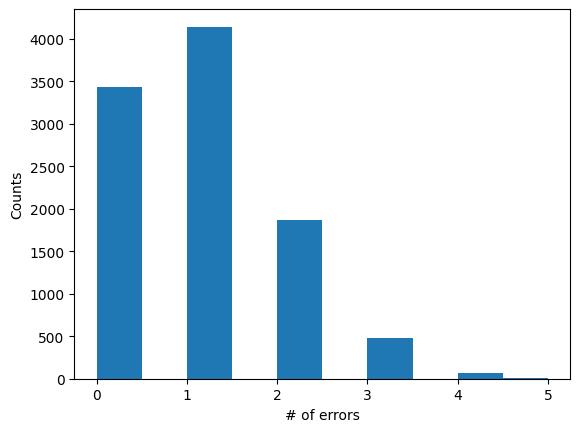

In [102]:
# Question 3 Part C


# number of random trials
N = 10000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40

for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices. These
    # arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)

    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout,
                                    50 * label_type + r[num_train:]))

    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y_numerical[idx_train]
    Xh = X[idx_holdout]
    yh = y_numerical[idx_holdout]

    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights

    wt = np.linalg.inv(Xt.T@Xt)@Xt.T@yt


    # Make predictions using the LS weights
    yh_est = Xh@wt

    # Turn the real-valued predictions into class labels
    yh_rounded = np.round(yh_est)
    yh_labels = np.clip(yh_rounded,-1,1)


    # Compute the errors

    # print(yh_rounded)
    # print(yh_labels)
    # print()
    errs[i] = np.sum(yh_labels != yh)


print(np.mean(errs) / 30)

plt.hist(errs)
plt.xlabel("# of errors")
plt.ylabel("Counts")
plt.show()


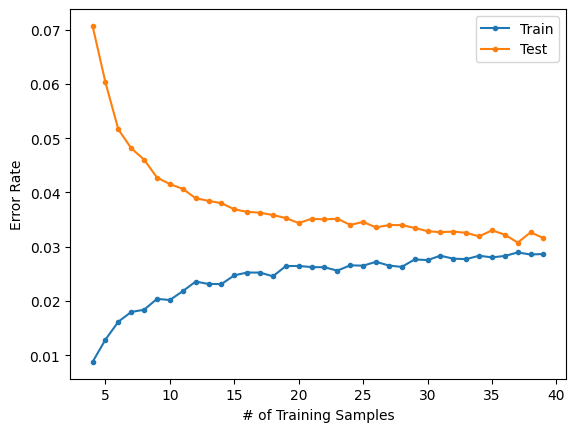

In [103]:

# number of random trials
N = 1_000
# Min / Max size of the training set
min_num_train = 4
max_num_train = 40

# Arrays to store error rates
train_errs = np.zeros((max_num_train-min_num_train, N))
test_errs = np.zeros((max_num_train-min_num_train, N))

n_train_vals = np.arange(min_num_train, max_num_train)


for j, n_train in enumerate(n_train_vals):
    for i in np.arange(N):
        # initialize 0-length arrays for the train and holdout indices.
        # These arrays will be filled in the inner loop.
        idx_train = np.zeros(0, dtype=np.intp)
        idx_holdout = np.zeros(0, dtype=np.intp)

        # There are 3 label types and 50 samples of each type
        for label_type in range(3):
            # Choose a random ordering of the 50 samples
            r = np.random.permutation(50)
            # Add the first num_train indices of the random ordering to
            # the idx_train array
            idx_train = np.concatenate((idx_train,
                                        50 * label_type + r[:n_train]))
            # Add the rest of the indices to the idx_holdout array
            idx_holdout = np.concatenate((idx_holdout,
                                        50 * label_type + r[n_train:]))

        # divide data and labels into the train and holdout sets
        Xt = X[idx_train,:]
        yt = y_numerical[idx_train]
        Xh = X[idx_holdout]
        yh = y_numerical[idx_holdout]

        ########################
        # YOUR CODE BELOW



        wt = np.linalg.inv(Xt.T@Xt)@Xt.T@yt


        # Make predictions using the LS weights
        yh_est = Xh@wt
        yh_rounded = np.round(yh_est)
        yh_labels = np.clip(yh_rounded,-1,1)

        yt_est = Xt@wt
        yt_rounded = np.round(yt_est)
        yt_labels = np.clip(yt_rounded,-1,1)




        # Compute the errors

        err_count_test = yh_labels != yh
        err_count_train = yt_labels != yt
        test_errs[j,i] = np.mean(err_count_test)
        train_errs[j,i] = np.mean(err_count_train)



###################
# YOUR CODE BELOW
# Make a plot of the train and test errors as a function of
# training set size

train_mean = np.mean(train_errs, axis=1)
test_mean = np.mean(test_errs, axis=1)

plt.plot(n_train_vals, train_mean, '.-', label='Train')
plt.plot(n_train_vals, test_mean, '.-', label='Test')
plt.legend()
plt.xlabel("# of Training Samples")
plt.ylabel("Error Rate")
plt.show()

0.05691


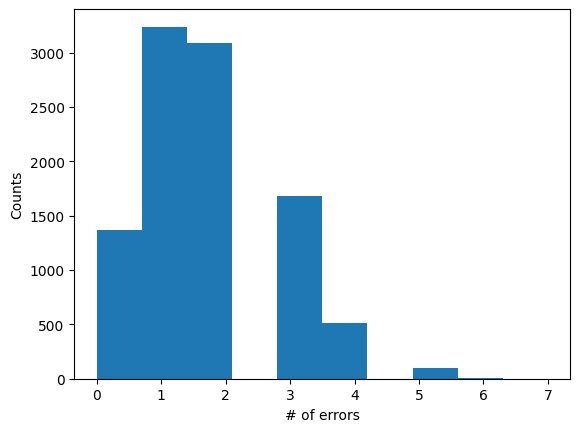

In [104]:
# Question 3 Part C

X = np.stack((X[:, 0], X[:, 2])).T

# number of random trials
N = 10000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40

for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices. These
    # arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)

    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout,
                                    50 * label_type + r[num_train:]))

    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y_numerical[idx_train]
    Xh = X[idx_holdout]
    yh = y_numerical[idx_holdout]

    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights

    wt = np.linalg.inv(Xt.T@Xt)@Xt.T@yt


    # Make predictions using the LS weights
    yh_est = Xh@wt

    # Turn the real-valued predictions into class labels
    yh_rounded = np.round(yh_est)
    yh_labels = np.clip(yh_rounded,-1,1)


    # Compute the errors

    # print(yh_rounded)
    # print(yh_labels)
    # print()
    errs[i] = np.sum(yh_labels != yh)


print(np.mean(errs) / 30)

plt.hist(errs)
plt.xlabel("# of errors")
plt.ylabel("Counts")
plt.show()


In [105]:
# Question 4 C
import numpy as np
import numpy.linalg as la

p = np.array(
[[4, 6, 0. ],
[2, 3, 0. ],
[0. , 3 , 1. ]]
)

x1 = p @ [1,0,0]
x2 = p @ [0,1,0]
u1 = x1 / la.norm(x1)
r2 = x2 - u1 @ x2 * u1
u2 = r2 / la.norm(r2)

print(u1)
print(u2)

[0.89442719 0.4472136  0.        ]
[0. 0. 1.]
